# 📊 Jour 6 : Régression Linéaire Multiple avec `statsmodels`

La régression multiple est une extension de la régression linéaire simple qui permet d'expliquer une variable dépendante à partir de plusieurs variables explicatives.
Dans ce cours, nous allons utiliser plusieurs prédicteurs pour expliquer le `tip` dans le dataset `tips`.

In [1]:
pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 699.0 kB/s eta 0:00:14
   -- ------------------------------------- 0.5/9.9 MB 699.0 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/9.9 MB 599.2 kB/s eta 0:00:16
   --- ------------------------------------ 0.8/9.9 MB 599.2 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.9 MB 565.8 kB/s eta 0:00:16
   ---- ----------------------------------- 1.0/9.9 MB 565.8 kB/s eta 0:00:16
   ----- ---------------------------------- 1.3/9.9 MB 633.2 kB/s eta 0:00:14
   ----- -------------------------------

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## 📥 Chargement du dataset

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 🔄 Encodage des variables catégorielles

In [4]:
# On encode les variables catégorielles avec des variables fictives
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,True,True,False,False,True,True
1,10.34,1.66,3,False,True,False,False,True,True
2,21.01,3.50,3,False,True,False,False,True,True
3,23.68,3.31,2,False,True,False,False,True,True
4,24.59,3.61,4,True,True,False,False,True,True


## 📈 Implémentation de la régression multiple

In [9]:
# On retire les lignes avec valeurs manquantes AVANT la séparation
df_clean = df_encoded.dropna()

X = df_clean.drop(columns='tip')
y = df_clean['tip']

# Affiche les types de colonnes pour diagnostic
print(X.dtypes)

# Supprime les colonnes non numériques si besoin
non_numeric_cols = X.columns[~X.dtypes.apply(lambda dt: np.issubdtype(dt, np.number))]
if len(non_numeric_cols) > 0:
    print("Colonnes non numériques retirées :", list(non_numeric_cols))
    X = X.drop(columns=non_numeric_cols)

# Vérifie à nouveau
assert all([np.issubdtype(dt, np.number) for dt in X.dtypes]), "Certaines colonnes ne sont pas numériques"

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

total_bill     float64
size             int64
sex_Female        bool
smoker_No         bool
day_Fri           bool
day_Sat           bool
day_Sun           bool
time_Dinner       bool
dtype: object
Colonnes non numériques retirées : ['sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           9.67e-34
Time:                        16:03:29   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.0927      0.009     10.172      0.000       0.075       0.111
size           0.1926      0.085      2.258      0.025       0.025       0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 📊 Analyse des résultats

In [11]:
# On affiche les coefficients significatifs
model.params[model.pvalues < 0.05]

const         0.668945
total_bill    0.092713
size          0.192598
dtype: float64

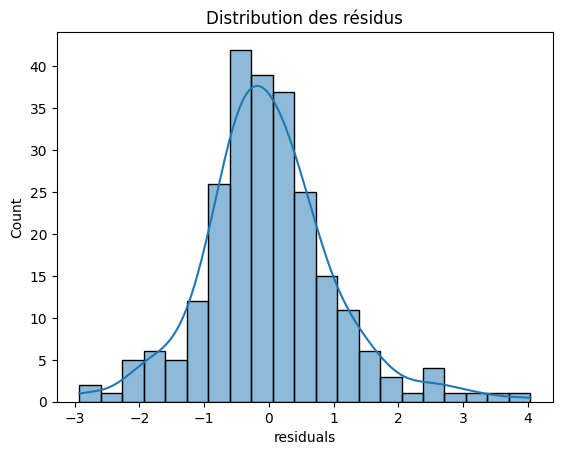

In [12]:
df['predicted'] = model.predict(X)
df['residuals'] = df['tip'] - df['predicted']
sns.histplot(df['residuals'], kde=True)
plt.title('Distribution des résidus')
plt.show()
     

## 📝 Exercices
- Quelle est la variable la plus significative dans la prédiction du pourboire ?
- Essayez un modèle uniquement avec `total_bill`, `size`, et `sex_Male`.
- Visualisez les résidus du modèle final.
- Vérifiez la multicolinéarité avec un `heatmap` des corrélations.